** This notebook** investigates various **vertical 231Pa profiles** in the Arctic. It is trying to understand what's relation between each profile and trying to better parameterize our coeff.

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import pandas as pd
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import matplotlib.cm as cm
% matplotlib inline

nc_filename = sorted(glob.glob('/ocean/xiaoxiny/research/data/total/T*.csv'))
nc_filename_= sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Pa/*.csv'))
print("found *.csv file: \n{}".format(nc_filename))



filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/*T200201-200712*.nc'))
ptrc=nc.Dataset(filename[0])
nav_lon=ptrc.variables['nav_lon'][:]
nav_lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]

bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]

found *.csv file: 
['/ocean/xiaoxiny/research/data/total/Total_r1.csv', '/ocean/xiaoxiny/research/data/total/Total_r2.csv', '/ocean/xiaoxiny/research/data/total/Total_r3.csv', '/ocean/xiaoxiny/research/data/total/Total_r4.csv', '/ocean/xiaoxiny/research/data/total/Total_r5.csv', '/ocean/xiaoxiny/research/data/total/Total_r6.csv']


# In Canada Basin:

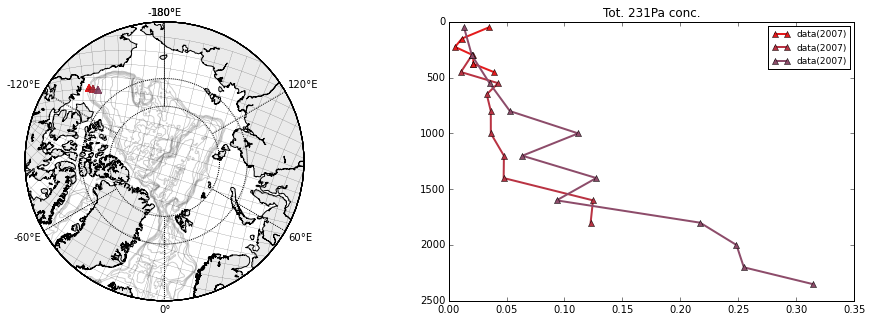

In [24]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round='True')

#data from Roger
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    y=data['231 tot.'];
    lon = data['long.'];
    lat = data['lat.'];
    #name= data['name'][0];

    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat) 

    lon=lon.compressed()
    lat=lat.compressed()
    
    if j<3 and len(lon)!=0:
        y_lon, yy_lat = m(lon, lat)
        m.scatter(y_lon,yy_lat,marker='^',s=40,color=cm.Set1(j*8),label='data(2009)')
    if j>=3 and len(lon)!=0:
        y_lon, yy_lat = m(lon, lat)
        m.scatter(y_lon,yy_lat,marker='s',s=40,color=cm.Set1(j*8),label='data(2009)',alpha=0.5)

    
#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)





ax = plt.subplot(1,2,2)

# Roger's
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    y= data['depth'].values;
    x=data['231 tot.'].values;
    lon = data['long.'].values;
    lat = data['lat.'].values;
    #name= data['name'][0];
    y_=[];x_=[];lon_=[];lat_=[];
    for i in range (len(x)):
        if x[i]>=0:
            y_.append(y[i]);x_.append(x[i])
            lon_.append(lon[i]);lat_.append(lat[i])
    if j<3 and len(lon_)!=0:
            plt.plot(x_,y_,'-^',lw=2,c=cm.Set1(j*8),label='data(2007)')
    if j>=3 and len(lon_)!=0:
            plt.plot(x_,y_,'-s',lw=2,c=cm.Set1(j*8),label='data(2009)',alpha=0.5) 


            
plt.legend(loc='upper right',prop={'size':9})#, bbox_to_anchor=(1.3,1),frameon=False)            
plt.ylim([0,2500])
plt.gca().invert_yaxis()
plt.title('Tot. 231Pa conc.')
plt.show()

Pa profiles are not availble in 2009 and 2000.

# On Ridges:

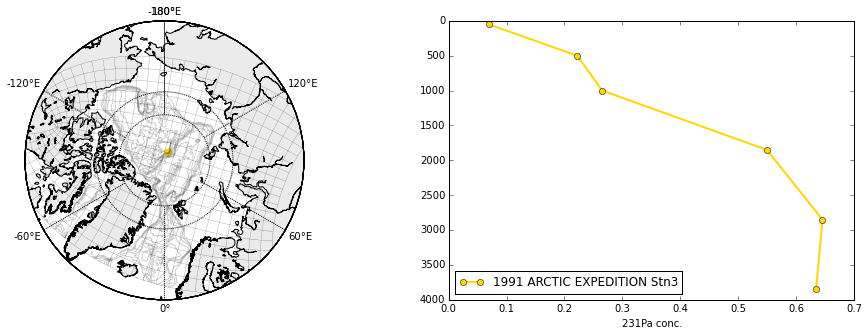

In [9]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')


#data from 1991   
data=pd.read_csv(nc_filename_[2])
lon = data['long.'];
lat = data['lat.'];
name= data['name'][0];  
y_lon, yy_lat = m(lon[0], lat[0])
m.scatter(y_lon,yy_lat,color='gold',s=40,label=name)



#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)

#1991
data=pd.read_csv(nc_filename_[2])
y= data['depth'].values;
x=data['231Pa part.']+data['231Pa diss.'];
x=np.ma.masked_where(y<=0,x)
y=np.ma.masked_where(y<=0,y) 
name= data['name'][0];    
plt.plot(x,y,'-o',lw=2,color='gold',label=name)


plt.gca().invert_yaxis()
#label
plt.legend(loc=3);plt.xlabel('231Pa conc.');plt.show()

# Nansen Basin

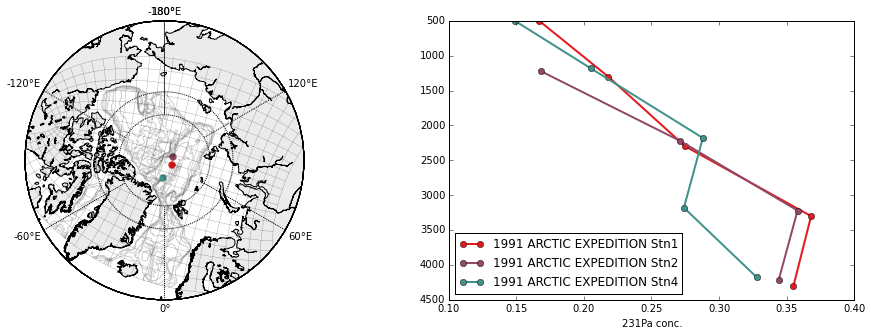

In [10]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')

for j in ([0,1,3]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,color=cm.Set1(j*15),s=40,label=name)

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
for j in ([0,1,3]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values;
    x=data['231Pa part.']+data['231Pa diss.'];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=cm.Set1(j*15),label=name)



plt.gca().invert_yaxis()
#label
plt.legend(loc=3);plt.xlabel('231Pa conc.');plt.show()

# All profiles

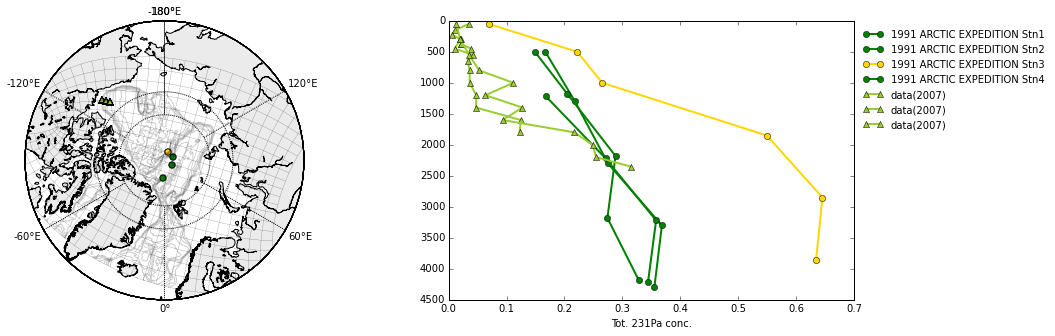

In [21]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')
col=['g','g','gold','g','purple','purple','yellowgreen']
# 1983,1991
for j in ([0,1,2,3]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=col[j],s=40,label=name)
    
#data from Roger in CB
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    y=data['231 tot.'];
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];

    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat) 

    lon=lon.compressed()
    lat=lat.compressed()
    
    if j<3 and len(lon)!=0:        
        ax.hold(True)        
        y_lon, yy_lat = m(lon, lat)
        m.scatter(y_lon,yy_lat,marker='^',s=40,c='yellowgreen',label=name)
    if j>=3 and len(lon)!=0:
        ax.hold(True)        
        y_lon, yy_lat = m(lon, lat)
        m.scatter(y_lon,yy_lat,marker='s',s=40,c='yellowgreen',label=name)
        

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
#1983,1991
for j in ([0,1,2,3]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values;
    x=data['231Pa part.']+data['231Pa diss.'];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],label=name)

# Roger's in CB
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    y= data['depth'].values;
    x=data['231 tot.'].values;
    y=np.ma.masked_where(x<=0,y)
    x=np.ma.masked_where(x<=0,x) 
    #name= data['name'][0];
    if j<3 :
        plt.plot(x,y,'-^',lw=2,c='yellowgreen',label='data(2007)')
            

plt.gca().invert_yaxis()
#label
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)
plt.xlabel('Tot. 231Pa conc.');plt.show()

In [28]:
import statsmodels.api as sm

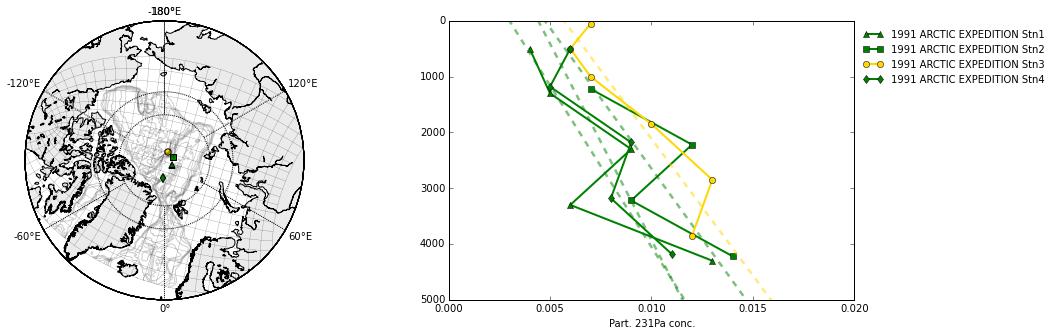

In [34]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')
col=['g','g','gold','g','purple','purple','yellowgreen']
mark=['^','s','o','d','*','H']
i=0
# 1983,1991
for j in ([0,1,2,3]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40,label=name)
    i+=1
        

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
#1983,1991
i=0
for j in ([0,1,2,3]):
    #read data
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values;
    x=data['231Pa part.']
    err =data['Pa_part_err']
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1

    #add wls 
    y2 = sm.add_constant(y,prepend=False)
    res_wls = sm.WLS(x, y2, weights=1./err**2).fit()
    plt.plot([0, 1.4],[0, 1.4]/res_wls.params[0]-res_wls.params[1]/res_wls.params[0], \
         '--.',c=col[j],linewidth=2.5,alpha=0.5)
            

plt.xlim(0,0.02);plt.ylim(0,5000);plt.gca().invert_yaxis()
#label
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)
plt.xlabel('Part. 231Pa conc.');plt.show()

```
lowest ice conc. :

    1991:  86%  
    1991:  83%
    1991:  80%
    1991:  71%

```

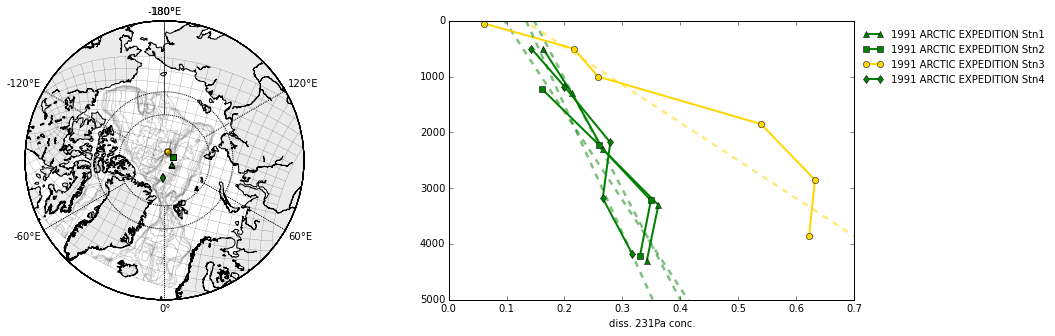

In [36]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')
col=['g','g','gold','g','purple','purple','yellowgreen']
mark=['^','s','o','d','*','H']
i=0
# 1983,1991
for j in ([0,1,2,3]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40,label=name)
    i+=1
        

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
#1983,1991
i=0
for j in ([0,1,2,3]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values;
    x=data['231Pa diss.'];
    err =data['Pa_diss_err']
    
    err=np.ma.masked_where(x<=0,err)
    y=np.ma.masked_where(x<=0,y)
    x=np.ma.masked_where(x<=0,x)
    
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    y2 = sm.add_constant(y,prepend=False)
    res_wls = sm.WLS(x, y2, weights=1./err**2).fit()#conc. depth
    plt.plot([0, 1.4],[0, 1.4]/res_wls.params[0]-res_wls.params[1]/res_wls.params[0], \
             '--.',c=col[j],linewidth=2.5,alpha=0.5)

plt.xlim(0,0.7);plt.ylim(0,5000);plt.gca().invert_yaxis()
#label
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)
plt.xlabel('diss. 231Pa conc.');plt.show()

In [37]:
# Figures below investigate the analy. solution calculated from NEMO model
xloc=[700-400,630-400,600-400]
yloc=[200,300,350]
c=['yellowgreen','gold','green']

In [38]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/*MIN*.nc'))
ptrc=nc.Dataset(nc_filename[0])
icePa = ptrc.variables['TR_11'][:,:,xloc,yloc]
iceTh = ptrc.variables['TR_12'][:,:,xloc,yloc]
dep = ptrc.variables['deptht'][:]
      
print icePa.shape

(19, 50, 3) (1, 3)


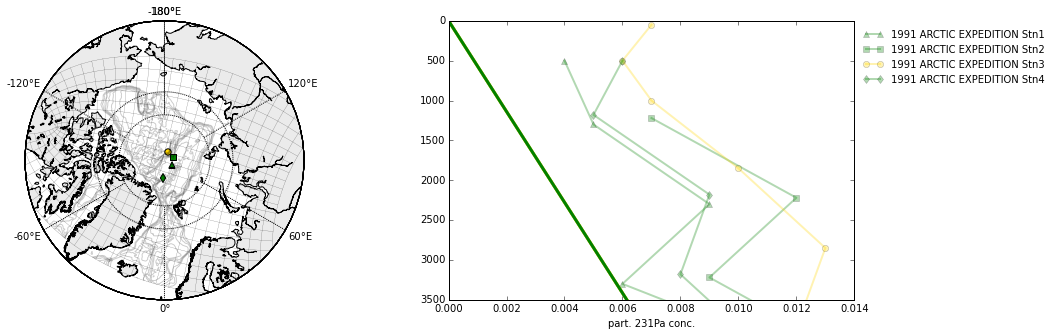

In [47]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')

i=0
# 1983,1991
for j in ([0,1,2,3]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40,label=name)
    i+=1
        

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
#1983,1991
i=0
for j in ([0,1,2,3]):
    #read data
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values;
    x=data['231Pa part.']
    err =data['Pa_part_err']
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name,alpha=0.3)
    i+=1

#analy. solution from NEMO:
for i in range(len(xloc)):
    k=0.02*icePa[-1,:,i]/icePa[-1,:,i]
    s=1400*icePa[-1,:,i]/icePa[-1,:,i]
    k_1=0.8*icePa[-1,:,i]/icePa[-1,:,i]
    plt.plot(0.00246/s*dep,dep,c=c[i],lw=3)
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)


plt.ylim(0,3500);plt.gca().invert_yaxis();plt.xlabel('part. 231Pa conc.');

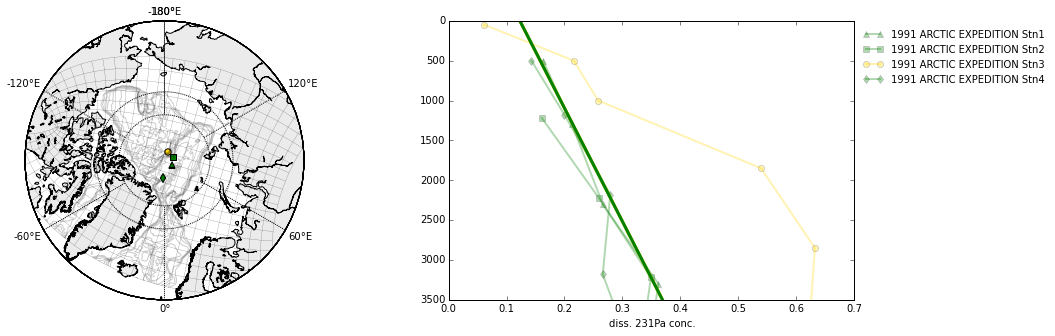

In [43]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')

i=0
# 1983,1991
for j in ([0,1,2,3]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40,label=name)
    i+=1
        

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
#1983,1991
i=0
for j in ([0,1,2,3]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values;
    x=data['231Pa diss.'];
    err =data['Pa_diss_err']
    
    err=np.ma.masked_where(x<=0,err)
    y=np.ma.masked_where(x<=0,y)
    x=np.ma.masked_where(x<=0,x)
    
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name,alpha=0.3)
    i+=1



#analy. solution from NEMO:
for i in range(len(xloc)):
    k=0.02*icePa[-1,:,i]/icePa[-1,:,i]
    s=1400*icePa[-1,:,i]/icePa[-1,:,i]
    k_1=0.8*icePa[-1,:,i]/icePa[-1,:,i]
    plt.plot(0.00246/k+k_1/k*0.00246/s*dep,dep,c=c[i],lw=3)
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)


plt.ylim(0,3500);plt.gca().invert_yaxis();plt.xlabel('diss. 231Pa conc.');